# VALIDATION IN MACHINE LEARNING
In this notebook we will describe the code required to divide our data into training and testing, create a simple linear regreesion model, fit the model to the training data, calculate the error of the model (MSE) using the testing data, and visualise the final model.

## Pre-processing
The next cells are a repetition of what we did last week.
### 1.- Import libraries

In [1]:
# We would require again the following libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
import numpy as np
import pandas as pd

In [2]:
# We will use a new library for machine learning, Scikit-learn. 
# This library allows us to implement easily machine learning models and operations over them. 
# This time we will use the predefined function to scale (min-max normalisation) our data
from sklearn.preprocessing import MinMaxScaler

In [3]:
# we will use the same library to divide our dataset in train and testing
from sklearn.model_selection import train_test_split

In [4]:
# We will import the functions to deal with a linear model.
import sklearn.linear_model as skl_lm
# and a function that calculates the performance
from sklearn.metrics import mean_squared_error

In [5]:
# We will use also another library to plot our model
import matplotlib.pyplot as plt

### 2.- Data acqusition, cleaning, and normalisation
Again, we use the same code to open another csv file, this time intended for a regression problem
The dataset represents the money invested in advertisement in TV, Radio, and Newspapers.
The last column represents the sales of the product.
A summary is as follows:

* 1.- Product ID
* 2.- TV
* 3.- Radio
* 4.- Newspapers
* 5.- Sales

In [11]:
# header: indicates if the dataset has an initial line with the name of each column
# If we visualise the dataset,we can see that the first row corresponds with the name of the columns
dataset = pd.read_csv('Advertising.csv', header=1)

In [12]:
# We can visualise the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       199 non-null    int64  
 1   230.1   199 non-null    float64
 2   37.8    199 non-null    float64
 3   69.2    199 non-null    float64
 4   22.1    199 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


We can see that, this time, the dataset doesn't have missing values

In [13]:
# sklearn provides different ways of normalising/scaling our data
# first, we need to create a scaler and then apply it to the data
# define a min-max scaler
scaler = MinMaxScaler()

In [14]:
# transform data
dataset_norm = scaler.fit_transform(dataset)

## A simple Hold-out method
### 1.- Division of our dataset

We decide to divide our dataset into two parts: 70% for training, and 30% for testing. For that, we will use the function **train_test_split**. This function will require to divide the predictors from the target/label column. Since our dataset is stored in numpy array, we can retrieve directly this data.

$[:, :-1]$ All rows and all columns except the last one

$[:, -1]$ All rows and last column

In [15]:
# we select all the colums except the last one
predictors = dataset_norm[:, :-1]
# for the target, we select the last column
target = dataset_norm[:, -1]

In [16]:
# to check the results, we print the dimensions of dataset
# the dimensions of the array of the predictors, which should be the same of the dataset with one column less
# the dimensions for the targets, which should be only one column
# Note that shape doesn't show dimensions equal to 1 in the columns
print('Dataset dimension: ',dataset_norm.shape)
print('Predictors dimension: ', predictors.shape)
print('Target dimension: ', target.shape)

Dataset dimension:  (199, 5)
Predictors dimension:  (199, 4)
Target dimension:  (199,)


In [18]:
# Now that we have an array with predictors and another with the target values, we can use our train_test_split function
# test_size = 0.3 means that 30% goes to testing and the rest 70% for validation (as we wanted)
# random_state we use always the same size to always spit the data in the same way. 
# Necessary for comparison of more than one mdoel
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 101)

In [19]:
# we can check again the dimension of our train and test datasets
print('Predictors dimensions for training: ', X_train.shape)
print('Predictors dimensions for testing: ', X_test.shape)
print('Target dimensions for training: ', y_train.shape)
print('Target dimensions for testing: ', y_test.shape)

Predictors dimensions for training:  (139, 4)
Predictors dimensions for testing:  (60, 4)
Target dimensions for training:  (139,)
Target dimensions for testing:  (60,)


### 2.- Creation, training and assessment of a simple linear model

To properly follow the full validation process and, for simplicity, we then use a linear regression model to predict whether a person has diabetes or not (same dataset of prevous lab). We will see the theory behind this simple machine learning model soon. Only to mention that this model tries to fit a line to our data using a one degree polynomial.
![LinearModel](img/Regression.png)


For simplicity, we will use only as predictors, the information regarding *TV advertisements*, (column 1), and the class variable (column 5).

In [21]:
# To be able to visualise the model in a 2-dimensional plot, 
# we select predictor 1 (Money spent in TV ads) as a single feature of the model for training and testing. 
# For that, we need to reshape them to have only one column
X_train_1 = X_train[:,1].reshape(-1,1)
X_test_1 = X_test[:,1].reshape(-1,1)

In **reshape(-1,1)**, we give **-1** value to the number of rows and **1** to the number of columns. The number of columns is easy to understand, we only want to have one feature for our model and this feature is stored in column 1 of the dataset. However, why **row=-1**?, with **-1**, we indicate Python that we don't know the number of columns and it should be the compiler the one that has to figure out this value. Note that we can only do that with only one of the dimensions of the matrix. This is wrong **reshape(-1,-1)**.

In [22]:
# Create a linear regression object. This is an empty and generic model
lm = skl_lm.LinearRegression()

In [23]:
# We need to train the model using our training sets
model = lm.fit(X_train_1, y_train)

We now use the **predict()** function from sklearn to estimate the performance achieved by the linear model using the testing set.

In [24]:
# Make predictions using the testing set
pred = model.predict(X_test_1)

Since we are using linear regression, the metric we use to measure the error is the *mean squared error* (MSE). MSE calculates the distance of each data point of the dataset to the closest point in the model, squared them, sum them up, and finally divide this quatity by the number of samples. Here, a graphical representation of the distance of each datapoint to the model:
![LinearModelError](img/RegressionError2.png)

In [25]:
# The MSE is calculated using the test dataset and the model
# Our mean square error is
MSE = mean_squared_error(y_test, pred)
print('MSE:', MSE)

0.015485860634487114


### 3.- Visualisation

First, we are going to show the coefficient *m* in the regression model and the intercept *b*.
Remember that follows the following formula:

$ y=mx + b$

In [26]:
print('Coefficient m: ', lm.coef_)
print('Intercept b: ', lm.intercept_)

Coefficient m:  [0.5628171]
Intercept b:  0.22347160919160947


Now we are going to plot the data and the linear model. For the data, we are going to use a scatter plot and a normal plot for the regression model.

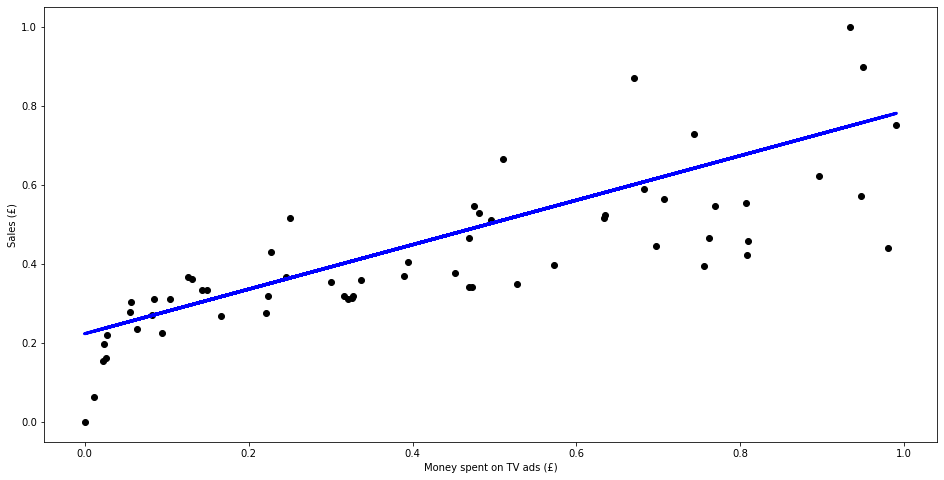

In [27]:
# Plot outputs
plt.figure(figsize=(16, 8))
plt.scatter(X_test_1, y_test,  color='black')
plt.plot(X_test_1, pred, color='blue', linewidth=3)

plt.xlabel("Money spent on TV ads (£)")
plt.ylabel("Sales (£)")

plt.show()

We can see here that the linear model does an OK job for most of the data, but it is not able to fit the data when the money spent in TV adverts is low.